<a href="https://colab.research.google.com/github/dmb0018/CS6678Midterm/blob/main/cs6678_midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


67
      Counties  Cases  Total Tested By County  Deaths  Death Rate
23      Dallas   3607                   18733     158        4.38
11     Choctaw    621                    2975      25        4.03
63      Walker   7338                   31398     280        3.82
42     Lowndes   1422                    5125      54        3.80
61  Tallapoosa   4138                   26180     155        3.75
13        Clay   1600                    7733      59        3.69
20    Crenshaw   1559                    6711      57        3.66
31      Greene    936                    4678      34        3.63
32        Hale   2272                   10748      78        3.43
5      Bullock   1243                    6239      42        3.38
8     Chambers   3728                   18911     124        3.33
46      Marion   3240                   13388     107        3.30
39    Lawrence   3133                   10849     100        3.19
6       Butler   2242                    9135      71        3.17
30     

,Cases,Total Tested By County,Deaths,Death Rate
count,67.00,67.00,67.00,67.00
mean,8188.91,41834.94,168.75,2.51
std,12285.74,69123.99,228.29,0.74
min,621.00,2975.00,25.00,0.90
25%,1874.00,9323.00,52.50,2.01
50%,3728.00,16848.00,100.00,2.45
75%,9777.50,43155.50,195.50,2.95
max,81003.00,457504.00,1566.00,4.38


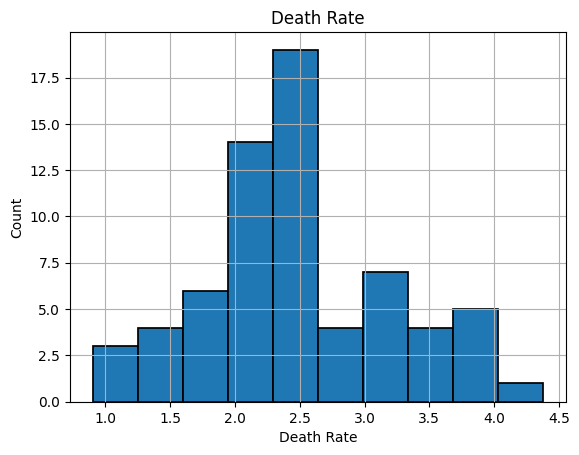

In [5]:
# Problem 1 - Case Data

import pandas as pd
import pylab as pl

path = "/content/drive/My Drive/Midterm/CaseData.xlsx"
df_CaseData = pd.read_excel(path)

# Ensure entire table can be displayed - format table
pd.options.display.max_rows = None
pd.options.display.width = 540
pd.options.display.float_format = lambda x: '%.2f' %x

# Determine number of counties
number_counties = len(df_CaseData)
print(number_counties)

# Create array to hold death rate values
array = [0]*number_counties

# Determine that values of each death rate
for x in range(number_counties):
  array[x] = df_CaseData.Deaths[x]/df_CaseData.Cases[x]*100


# Insert death rate into existing dataframe
df_CaseData["Death Rate"] = array

# Sort the values according to death rate
df2_CaseData = df_CaseData.sort_values(['Death Rate', 'Counties'], ascending=False)
print(df2_CaseData)

# Create histogram of death rate
df_CaseData.hist(column='Death Rate',bins=10,edgecolor='black',linewidth =1.25)
pl.xlabel("Death Rate")
pl.ylabel("Count")

#Cummulative values
total_deaths = df_CaseData["Deaths"].sum()
total_cases = df_CaseData["Cases"].sum()
total_DeathRate = total_deaths/total_cases
print("The cummulative death rate for the state of Alabama is: ", total_DeathRate)

# Describe table
df_CaseData.describe()


Number of vaccine providers is:  407
                                                  Name                                            Address      County
7                             ADAMS DRUGS - PRATTVILLE        103 S. MEMORIAL DRIVE, PRATTVILLE, AL 36066     AUTAUGA
21                   AMERICAN FAMILY CARE - PRATTVILLE      1965 COBBS FORD RD, PRATTVILLE, AL 36066-7290     AUTAUGA
35                                AUTAUGA CO HLTH DEPT          219 N COURT ST, PRATTVILLE, AL 36067-3003     AUTAUGA
404                          WYBENGA FAMILY HEALTHCARE       564 N MEMORIAL DR, PRATTVILLE, AL 36067-2132     AUTAUGA
20                 AMERICAN FAMILY CARE - ORANGE BEACH  25775 PERDIDO BEACH BLVD STE E5, ORANGE BEACH,...     BALDWIN
36                  BALDWIN CO HLTH DEPT - ROBERTSDALE    23280 GILBERT DRIVE, ROBERTSDALE, AL 36567-0369     BALDWIN
140                                FAIRHOPE PEDIATRICS          19087B GREENO RD, FAIRHOPE, AL 36532-3899     BALDWIN
162          FPHC -

,Vaccine Providers Count
count,67.00
mean,6.07
std,4.34
min,1.00
25%,3.50
50%,5.00
75%,7.00
max,28.00


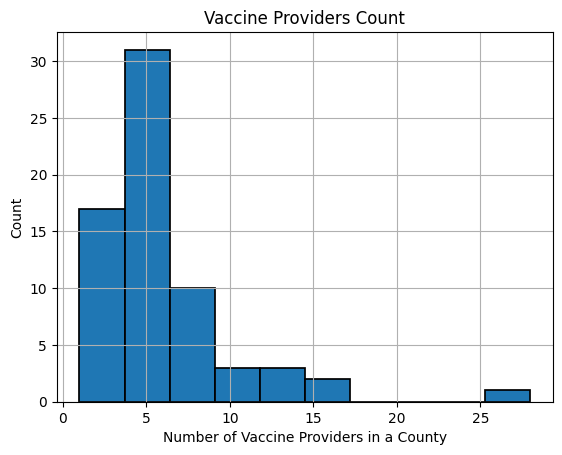

In [4]:
# Problem 2 - Vaccine Providers

import pandas as pd
import pylab as pl


path = "/content/drive/My Drive/Midterm/VaccineProviders.xlsx"


df_VaccineProviders = pd.read_excel(path)

# Determine number of vaccine providers
number_providers = len(df_VaccineProviders)
print("Number of vaccine providers is: ", number_providers)

# Ensure entire table can be displayed
pd.options.display.max_rows = None
pd.options.display.width = 540

# Sort the list of vaccine providers by county first, then by name
df2_VaccineProviders = df_VaccineProviders.sort_values(['County', 'Name'], ascending=True)
print(df2_VaccineProviders)

# Print count of number providers in each county - Make count title be count instead of name and address!
df3_VaccineProviders_Count = df_VaccineProviders.groupby(['County']).count().reset_index()
df3_VaccineProviders_Count.drop(columns=['Address'],inplace=True)
df3_VaccineProviders_Count.rename(columns={"Name":"Vaccine Providers Count"},inplace=True)

# Change name to count - Remove
print(df3_VaccineProviders_Count)

# Histogram
df3_VaccineProviders_Count.hist(column='Vaccine Providers Count',bins=10,edgecolor='black',linewidth =1.25)
pl.xlabel("Number of Vaccine Providers in a County")
pl.ylabel("Count")

#Describe the table
df3_VaccineProviders_Count.describe()

        County  Population  People receiving at least one dose  % People receiving at least one dose  CompletelyVaccinated  Doses Administered  Completely Vaccinated Rate
45     Madison      372909                              154788                                 41.51                130736              274646                       35.06
33        Hale       14651                                5895                                 40.24                  5092               10317                       34.76
43     Lowndes        9726                                4489                                 46.15                  3341                7689                       34.35
58      Shelby      217702                               91645                                 42.10                 74648              160717                       34.29
37   Jefferson      658573                              277221                                 42.09                224396              486364   

,Population,People receiving at least one dose,% People receiving at least one dose,CompletelyVaccinated,Doses Administered,Completely Vaccinated Rate
count,67.00,67.00,67.00,67.00,67.00,67.00
mean,140797.93,49664.87,32.55,40886.01,87682.06,26.69
std,599154.95,218024.96,5.08,179123.28,384423.14,4.07
min,8111.00,3140.00,19.24,2425.00,5449.00,15.44
25%,17636.50,5846.50,29.00,4877.50,10365.50,24.12
50%,33254.00,9911.00,32.39,8190.00,17319.00,26.21
75%,82488.50,25734.50,35.43,21898.50,46293.00,29.23
max,4903185.00,1778271.00,46.15,1461323.00,3135348.00,34.76


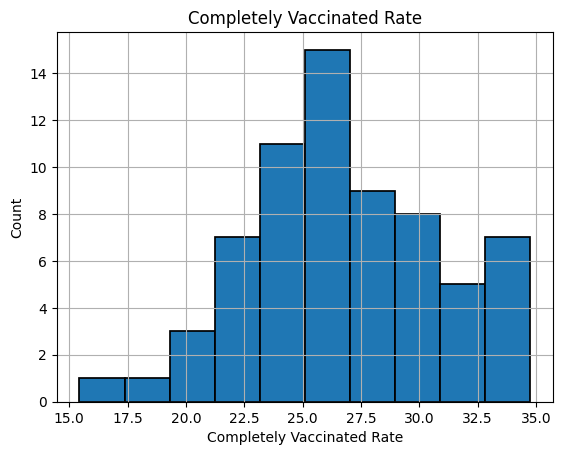

In [6]:
# Problem 3 - Vaccine Data
import pandas as pd
import matplotlib.pyplot as plt

path = "/content/drive/My Drive/Midterm/VaccineData.xlsx"
df_VaccineData = pd.read_excel(path)


pd.options.display.max_rows = None
pd.options.display.width = 540
number_counties = len(df_VaccineData)

df_VaccineData.rename(columns={"Population > 16":"Population"},inplace=True)
df_VaccineData.rename(columns={"People Completely Vaccinated":"CompletelyVaccinated"},inplace=True)
array = [0]*(number_counties)

for x in range(number_counties):
  array[x] = df_VaccineData.CompletelyVaccinated[x]/df_VaccineData.Population[x] *100



df_VaccineData["Completely Vaccinated Rate"] = array


df2_VaccineData = df_VaccineData.sort_values(['Completely Vaccinated Rate', 'County'], ascending=False)
print(df2_VaccineData)

#Process to filter out the outlier (unknown)
q_low = df2_VaccineData["Completely Vaccinated Rate"].quantile(0.01)
q_hi  = df2_VaccineData["Completely Vaccinated Rate"].quantile(0.99)
df2_filtered = df2_VaccineData[(df2_VaccineData["Completely Vaccinated Rate"] < q_hi) & (df2_VaccineData["Completely Vaccinated Rate"] > q_low)]

# Create histogram with outlier filtered out
df2_filtered.hist(column='Completely Vaccinated Rate',bins=10,edgecolor='black',linewidth =1.25)
plt.xlabel("Completely Vaccinated Rate")
plt.ylabel("Count")

# Describe the table
df2_filtered.describe()

In [7]:
import pandas as pd

df2_VaccineData_minusAlabama = df2_VaccineData.drop([0,64], axis = 0) # Drops Alabama and unknown
df2_VaccineData_minusAlabama = df2_VaccineData_minusAlabama.sort_values(['County', 'Completely Vaccinated Rate'], ascending=True)
df2_VaccineData_minusAlabama = df2_VaccineData_minusAlabama.reset_index()
#print(df2_VaccineData_minusAlabama)
frames = [df2_CaseData,df2_VaccineData_minusAlabama,df3_VaccineProviders_Count]



# Create combined Table
combined_table = pd.concat(frames, axis = 1, ignore_index = False, sort=True)
combined_table.drop(columns=['index'],inplace=True)
combined_table.drop(columns=['County'],inplace=True)

#Add columns
number_counties = len(combined_table)
array = [0]*(number_counties)
combined_table.rename(columns={"Vaccine Providers Count":"VaccineProvidersCount"},inplace=True)
for x in range(number_counties):
  array[x] = combined_table.Population[x]/combined_table.VaccineProvidersCount[x]



combined_table["Population per Provider"] = array

print(combined_table)

      Counties  Cases  Total Tested By County  Deaths  Death Rate  Population  People receiving at least one dose  % People receiving at least one dose  CompletelyVaccinated  Doses Administered  Completely Vaccinated Rate  VaccineProvidersCount  Population per Provider
0      Autauga   7241                   30404     113        1.56       55869                               17337                                 31.03                 13682               30085                       24.49                      4                 13967.25
1      Baldwin  21868                  117931     314        1.44      223234                               77995                                 34.94                 62524              137230                       28.01                      6                 37205.67
2      Barbour   2345                   12786      59        2.52       24686                                7771                                 31.48                  5890               13

In [8]:
# Show correlations of the combined table
combined_table.corr(numeric_only = True)

,Cases,Total Tested By County,Deaths,Death Rate,Population,People receiving at least one dose,% People receiving at least one dose,CompletelyVaccinated,Doses Administered,Completely Vaccinated Rate,VaccineProvidersCount,Population per Provider
Cases,1.00,0.99,0.97,-0.41,0.97,0.96,0.25,0.96,0.96,0.29,0.87,0.61
Total Tested By County,0.99,1.00,0.96,-0.39,0.97,0.96,0.27,0.96,0.96,0.31,0.86,0.60
Deaths,0.97,0.96,1.00,-0.26,0.95,0.95,0.26,0.94,0.95,0.29,0.89,0.57
Death Rate,-0.41,-0.39,-0.26,1.00,-0.38,-0.34,0.21,-0.35,-0.35,0.13,-0.33,-0.46
Population,0.97,0.97,0.95,-0.38,1.00,0.99,0.28,0.99,0.99,0.33,0.86,0.69
People receiving at least one dose,0.96,0.96,0.95,-0.34,0.99,1.00,0.34,1.00,1.00,0.38,0.84,0.66
% People receiving at least one dose,0.25,0.27,0.26,0.21,0.28,0.34,1.00,0.34,0.34,0.96,0.14,0.17
CompletelyVaccinated,0.96,0.96,0.94,-0.35,0.99,1.00,0.34,1.00,1.00,0.38,0.84,0.67
Doses Administered,0.96,0.96,0.95,-0.35,0.99,1.00,0.34,1.00,1.00,0.38,0.84,0.67
Completely Vaccinated Rate,0.29,0.31,0.29,0.13,0.33,0.38,0.96,0.38,0.38,1.00,0.17,0.25


In [9]:
# Provide more details of the combined table
combined_table.describe()

,Cases,Total Tested By County,Deaths,Death Rate,Population,People receiving at least one dose,% People receiving at least one dose,CompletelyVaccinated,Doses Administered,Completely Vaccinated Rate,VaccineProvidersCount,Population per Provider
count,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00
mean,8188.91,41834.94,168.75,2.51,73181.87,25433.78,32.63,21026.51,44985.01,26.77,6.07,10151.71
std,12285.74,69123.99,228.29,0.74,107333.01,42805.96,5.17,35167.77,75688.77,4.18,4.34,7778.76
min,621.00,2975.00,25.00,0.90,8111.00,3140.00,19.24,2425.00,5449.00,15.44,1.00,2205.83
25%,1874.00,9323.00,52.50,2.01,17636.50,5846.50,29.00,4877.50,10365.50,24.12,3.50,4916.50
50%,3728.00,16848.00,100.00,2.45,33254.00,9911.00,32.39,8190.00,17319.00,26.21,5.00,7375.14
75%,9777.50,43155.50,195.50,2.95,82488.50,25734.50,35.43,21898.50,46293.00,29.23,7.00,12425.08
max,81003.00,457504.00,1566.00,4.38,658573.00,277221.00,46.15,224396.00,486364.00,35.06,28.00,37205.67


In [10]:
# Provide more precise value for interesting correlations
correlation1 = combined_table["Completely Vaccinated Rate"].corr(combined_table["Death Rate"])
print("The correlation between Completely Vaccinated Rate and Death Rate is: ", correlation1)

correlation2 = combined_table["% People receiving at least one dose"].corr(combined_table["Death Rate"])
print("The correlation between % People receiving at least one dose and Death Rate is: ", correlation2)

correlation3 = combined_table["Completely Vaccinated Rate"].corr(combined_table["VaccineProvidersCount"])
print("The correlation between Completely Vaccinated Rate and Vaccine Providers Count is: ", correlation3)

correlation4 = combined_table["Population"].corr(combined_table["Death Rate"])
print("The correlation between Population and Death Rate is: ", correlation4)

correlation5 = combined_table["Population per Provider"].corr(combined_table["Completely Vaccinated Rate"])
print("The correlation between Completely Vaccinated Rate and Population per Provider is: ", correlation5)

correlation6 = combined_table["Population per Provider"].corr(combined_table["Population"])
print("The correlation between Completely Vaccinated Rate and Population per Provider is: ", correlation6)

The correlation between Completely Vaccinated Rate and Death Rate is:  0.13231998959906185
The correlation between % People receiving at least one dose and Death Rate is:  0.21160987730077913
The correlation between Completely Vaccinated Rate and Vaccine Providers Count is:  0.16665864438568834
The correlation between Population and Death Rate is:  -0.3841222645182884
The correlation between Completely Vaccinated Rate and Population per Provider is:  0.24975214226958836
The correlation between Completely Vaccinated Rate and Population per Provider is:  0.6917845453976261


<ipython-input-12-348a783e9032>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combined_table.corr(), annot = True)


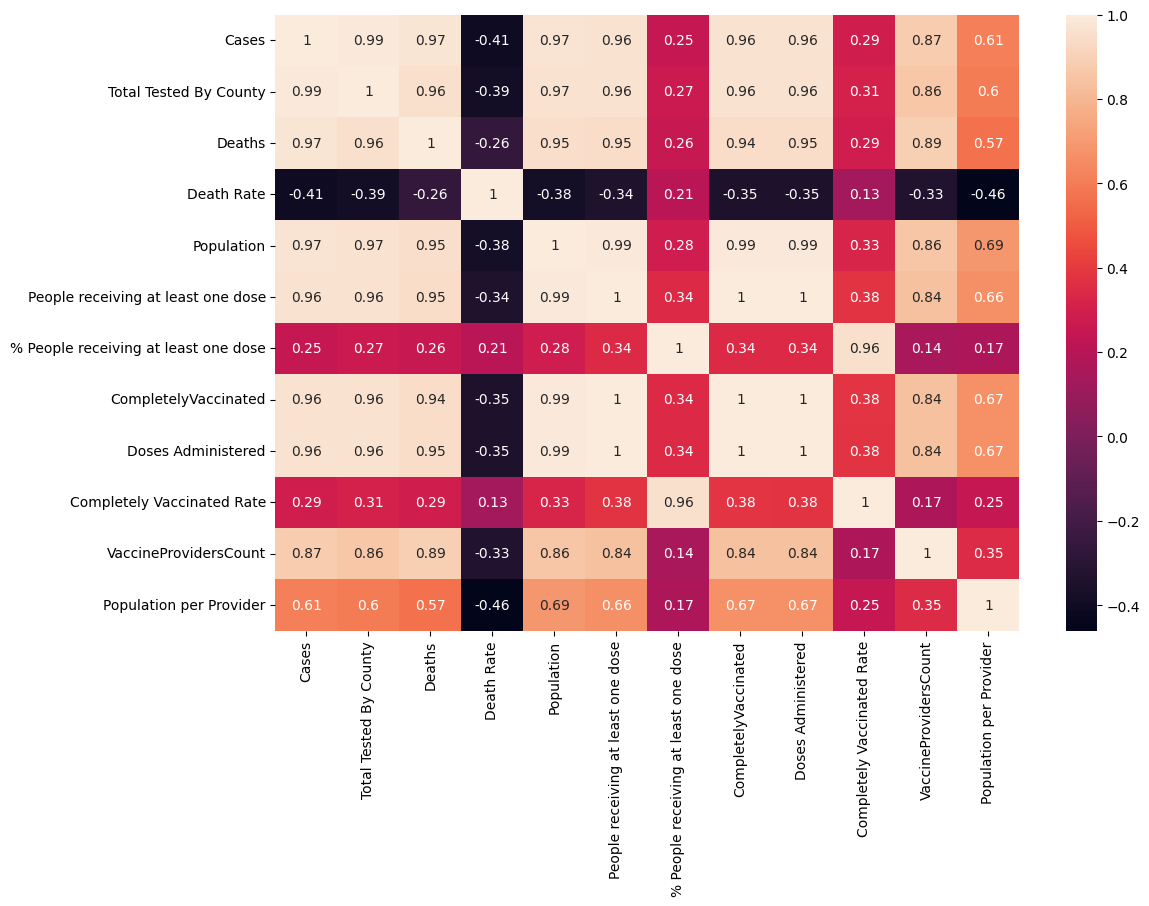

In [12]:
# Create heatmap of correlations
import seaborn as sns
sns.heatmap(combined_table.corr(), annot = True)
plt.rcParams['figure.figsize'] = (15,8)

plt.show()

<Axes: >

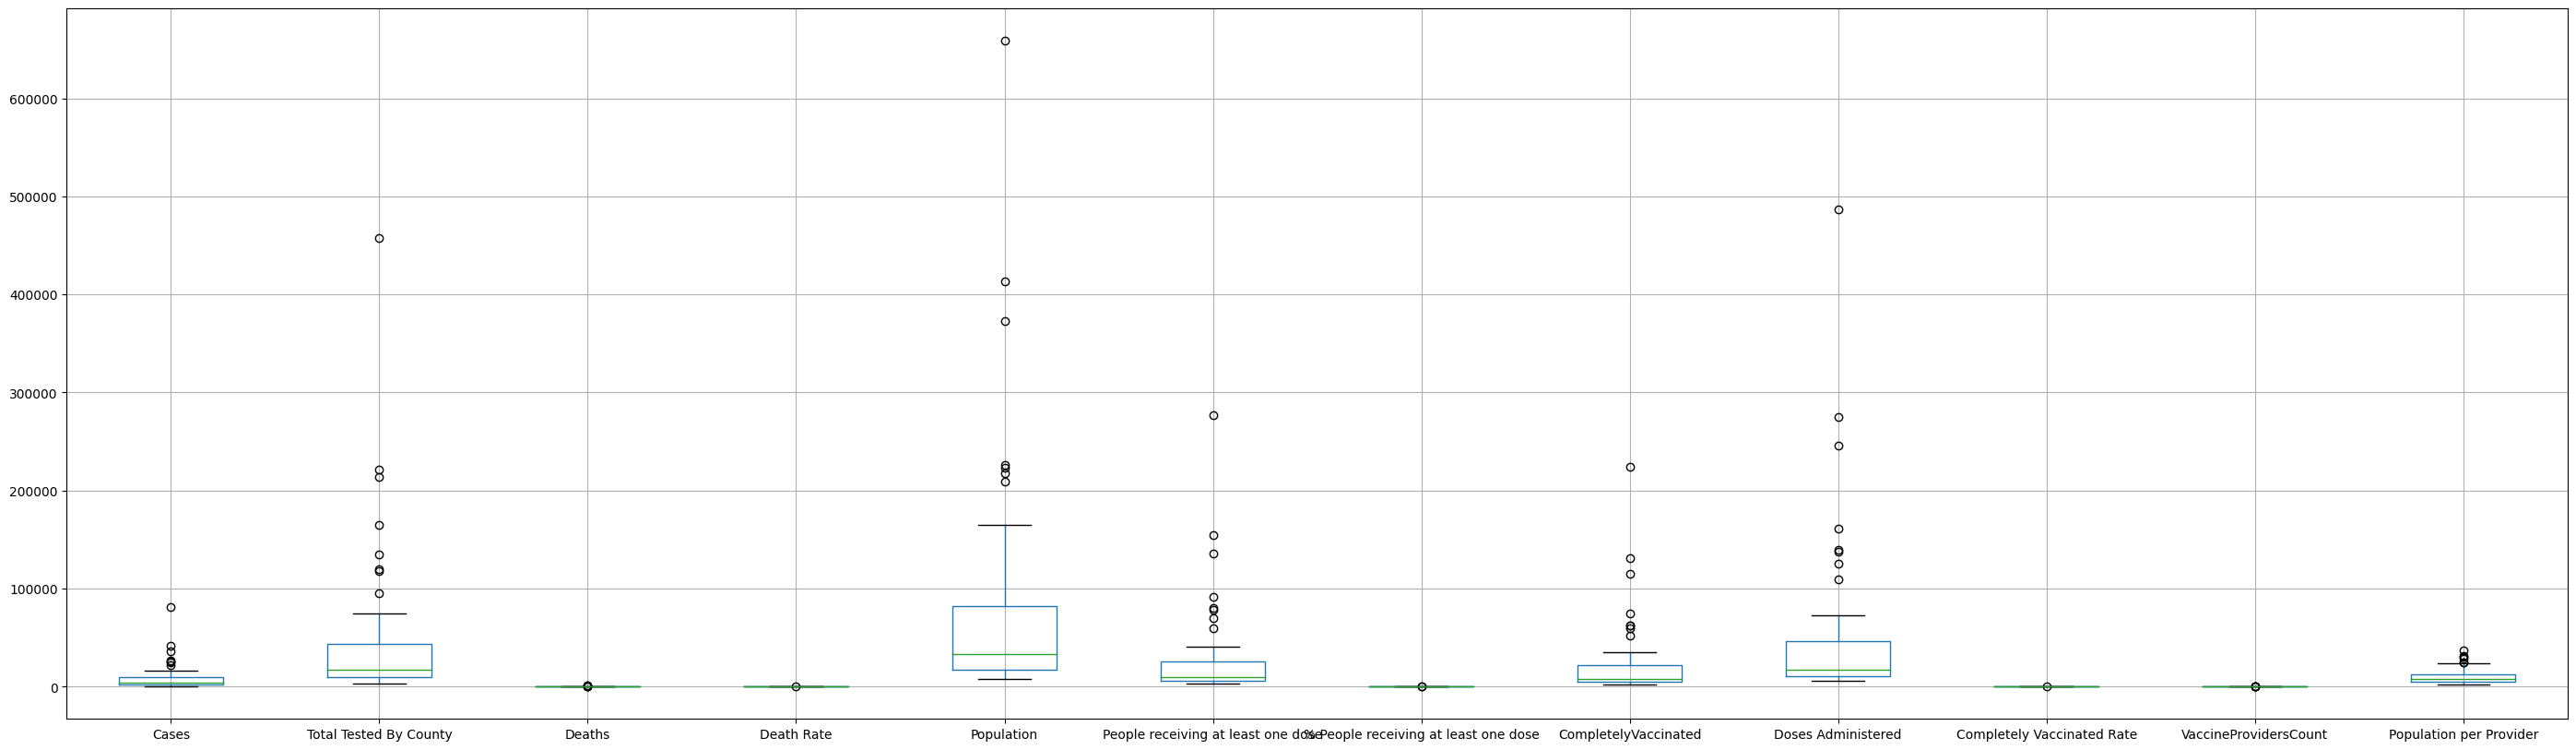

In [13]:
# Boxplot of all the data values being compared
combined_table.boxplot(figsize = (35,10))

      Counties  Death Rate  % People receiving at least one dose  Completely Vaccinated Rate
42     Lowndes        3.80                                 46.15                       34.35
57   St. Clair        2.47                                 42.10                       34.29
36   Jefferson        1.93                                 42.09                       34.07
5      Bullock        3.38                                 41.72                       33.97
44     Madison        1.47                                 41.51                       35.06
52       Perry        2.39                                 41.29                       33.72
45     Marengo        2.59                                 40.57                       33.29
32        Hale        3.43                                 40.24                       34.76
65      Wilcox        2.36                                 39.98                       31.65
31      Greene        3.63                                 38.71      

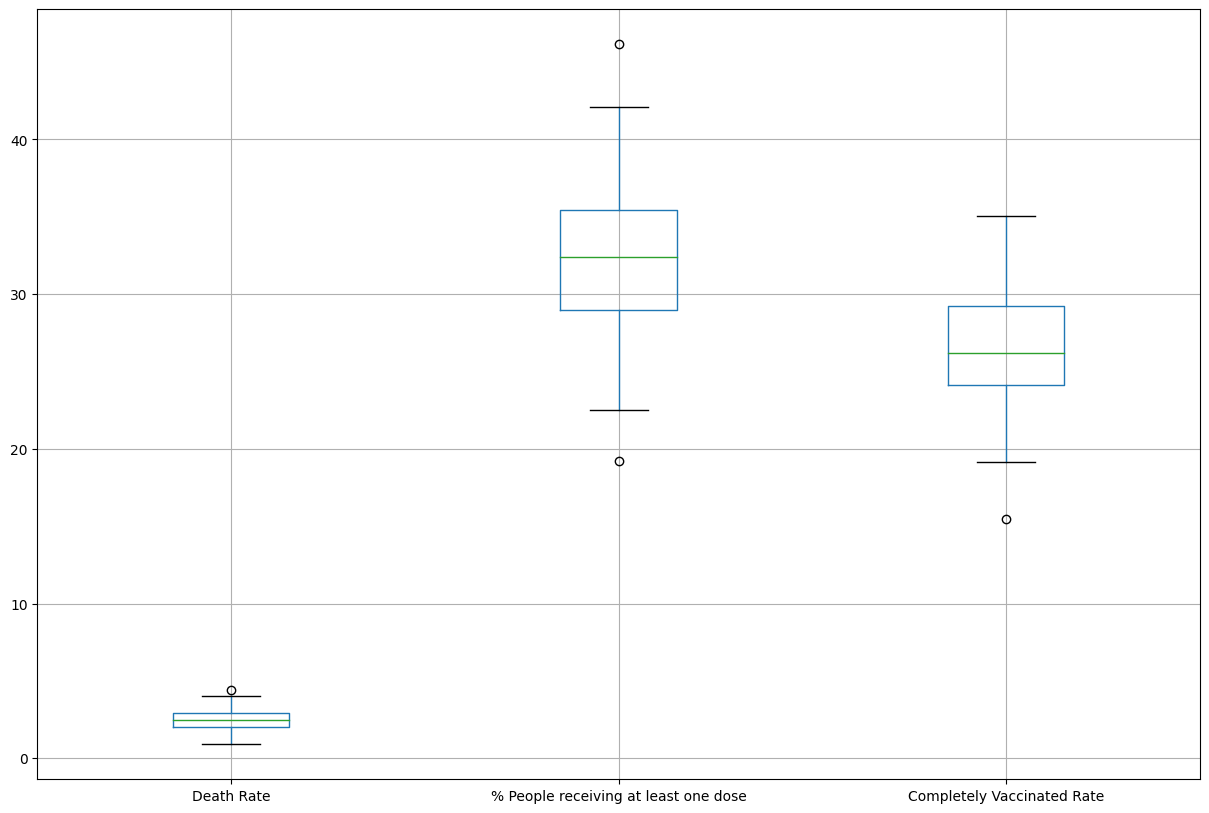

In [14]:
# Create a new table that includes percentages so that the box plots can be seen clearly
counties_table = combined_table.select_dtypes(include='object')
floats_table = combined_table.select_dtypes(include='float')

frames = [counties_table,floats_table]
combined_table2 = pd.concat(frames, axis = 1, ignore_index = False, sort=True)
combined_table2.drop(columns=['Population per Provider'],inplace=True)
combined_table2.boxplot(figsize = (15,10))

combined_table2 = combined_table2.sort_values(['% People receiving at least one dose'], ascending=False)
print(combined_table2)

      Counties  Cases  Total Tested By County  Population  People receiving at least one dose  CompletelyVaccinated  Doses Administered
0      Autauga   7241                   30404       55869                               17337                 13682               30085
1      Baldwin  21868                  117931      223234                               77995                 62524              137230
2      Barbour   2345                   12786       24686                                7771                  5890               13219
3         Bibb   2685                   14728       22394                                6642                  4959               11155
4       Blount   6945                   27790       57826                               16750                 13768               29359
5      Bullock   1243                    6239       10101                                4214                  3431                7471
6       Butler   2242                    9135   

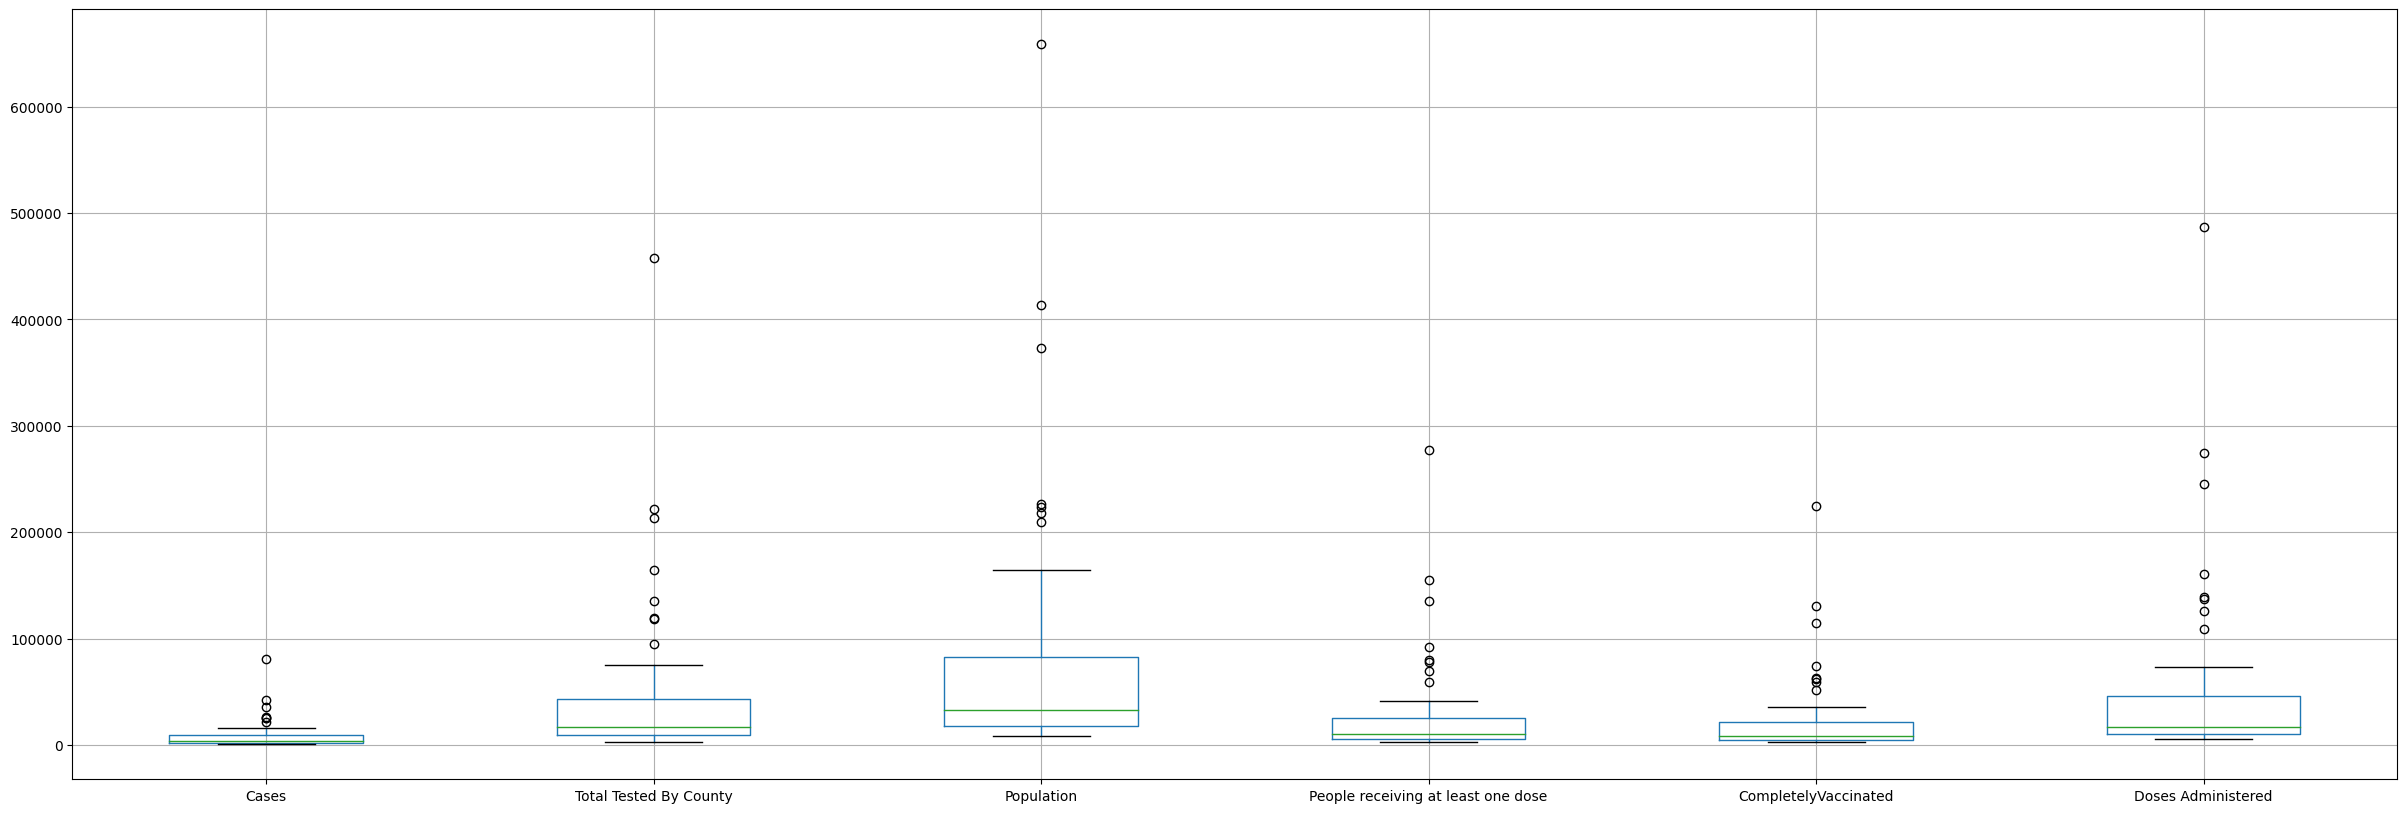

In [15]:
# Create new table with just the integer values (and county description)
counties_table = combined_table.select_dtypes(include='object')
int_table = combined_table.select_dtypes(include='int64')

frames = [counties_table,int_table]
combined_table3 = pd.concat(frames, axis = 1, ignore_index = False, sort=True)

# Remove two rows from the new table that create a boxplot that the user is unable to see any valuable information
combined_table3.drop(columns=['Deaths'],inplace=True)
combined_table3.drop(columns=['VaccineProvidersCount'],inplace=True)
combined_table3.boxplot(figsize = (30,10))

print(combined_table3)